In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

STYLE = "#ffffff"

%load_ext autoreload
%autoreload 2

In [156]:
class Sculptor():
    
    def __init__(self, void_dim, n_elements, element_min_side, element_max_side, step, verbose):
        self.void = np.zeros((void_dim, void_dim, void_dim))
        self.element_min_side = element_min_side
        self.element_max_side = element_max_side
        self.step = step
        self.verbose= verbose
        self.n_elements = n_elements
        
        self.element = None
        self.working_plane = None
        self.section = None
        self.delta = None
        self.top_left_corner = None
        self.bottom_right_corner = None
        
    def print_information(self):#, element, axis_selection, delta, section, top_left_corner, bottom_right_corner):
        print(f"void shape is: {np.array(self.void[0].shape)}")
        print(f"element shape is : {np.array(element.shape)}")
        print(f"the axis selection is: {axis_selection}")
        print(f"delta is: {delta}")
        print(f"section is: {section}")
        print(f"top left corner is: {top_left_corner}")
        print(f"bottom right corner is: {bottom_right_corner}")
        print(f"slices are: {top_left_corner[0]}:{bottom_right_corner[0]} and {top_left_corner[1]}:{bottom_right_corner[1]}")
        print("###############################################################")
        
    def prueba(self):
        print(self.void.shape)
        print(self.element_min_side)
        print(self.element_max_side)
        print(self.step)
        print(self.verbose)
        
    def axis_selection(self):
        pass
    
    def add_edge(self): # element sizes
        pass
    
    def add_plane(self): # element sizes
        
        for plane in range(self.n_elements):
            
            self.element = None
            self.working_plane = None
            self.section = None
            self.delta = None
            self.top_left_corner = None
            self.bottom_right_corner = None
            self.axis_selection = np.random.randint(low=0, high=3)
            
            self.section = np.random.randint(low=0-1, high=self.void[0].shape[0])
            # selection of the axis to work on

            if axis_selection == 0:
                self.working_plane = self.void[self.section,:,:]
            elif axis_selection == 1:
                self.working_plane = self.void[:,self.section,:]  
            elif axis_selection == 2:
                self.working_plane = self.void[:,:,self.section]
            else:
                print("error")
            # axis selection

            if self.verbose == True:
                print(self.working_plane)
                print("###############################################################")

            #Variables

            self.element = np.ones((random.randrange(self.element_min_side, self.element_max_side, self.step), random.randrange(self.element_min_side, self.element_max_side, self.step)))
            # creates the element to be inserted
            self.delta = np.array(self.working_plane.shape) - np.array(self.element.shape) 
            # finds the delta between the size of the void and the size of the element
            self.top_left_corner = (coor_i, coor_j) = (np.random.randint(low=0, high=self.delta[0]) , np.random.randint(low=0, high=self.delta[1]))
            # finds the coordinates of the top left corner
            self.top_left_corner = np.array(self.top_left_corner)
            # converts the result in an array
            self.bottom_right_corner = np.array(self.top_left_corner) + np.array(self.element.shape) #- np.array([1,1]))
            # finds the coordinates of the bottom right corner
            self.working_plane[self.top_left_corner[0]:self.bottom_right_corner[0] , self.top_left_corner[1]:self.bottom_right_corner[1]] = self.element
            # makes the slides using the coordinates equal to the element

            if self.verbose == True:
                self.print_information()
        
        return self.void
    
    def add_volume(self): # element sizes
        pass
    
    def add_pipe(self):
        pass
    
    def add_cantilever(self):
        pass
    
    def print_information(self):
        print(f"void shape is: {np.array(self.void[0].shape)}")
        print(f"element shape is : {np.array(self.element.shape)}")
        print(f"the axis selection is: {self.axis_selection}")
        print(f"delta is: {self.delta}")
        print(f"section is: {self.section}")
        print(f"top left corner is: {self.top_left_corner}")
        print(f"bottom right corner is: {self.bottom_right_corner}")
        print(f"slices are: {self.top_left_corner[0]}:{self.bottom_right_corner[0]} and {self.top_left_corner[1]}:{self.bottom_right_corner[1]}")
        print("###############################################################")
        
    def generative_sculpt(self):
    
        void = np.zeros((void_dim, void_dim, void_dim))

        for i in range(n_planes):
            time.sleep(0)
            axis_selection = np.random.randint(low=0, high=3)
            add_plane(void, axis_selection, element_min_side=9, element_max_side=17, step=1, verbose=False)

            axis_selection = np.random.randint(low=0, high=3)
            add_edge(void, axis_selection, element_min_side=12, element_max_side=24, step=1, verbose=False)

        for i in range(n_planes):
            add_pipe(void, axis_selection, element_min_side=4, element_max_side=14, step=1, verbose=False)

        return self.void
    
    def plot_sections(self):
        
        sculpture = self.void
        fig, axes = plt.subplots(ncols=6, nrows=int(np.ceil(self.void.shape[0]/6)), figsize=(25, int(25/6)), facecolor = (STYLE))
        axes = axes.ravel() # flats
        for index in range(self.void.shape[0]):
            axes[index].imshow(sculpture[index,:,:], cmap = "gray")
            
    def plot_sculpture(self):
        
        sculpture = self.void
        fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(25, 25), facecolor = (STYLE), subplot_kw=dict(projection="3d"))
        axes = axes.ravel() # flats
        for index in range(1):
            axes[index].voxels(sculpture, facecolors="orange", edgecolors="k", linewidth=0.05)

In [157]:
axis_selection = np.random.randint(low=0, high=3)

In [158]:
sculptor = Sculptor(void_dim = 5, n_elements = 5, element_min_side= 2, element_max_side = 5, step = 1, verbose = False)

sculpture = sculptor.add_plane()


In [159]:
13 / 6

2.1666666666666665

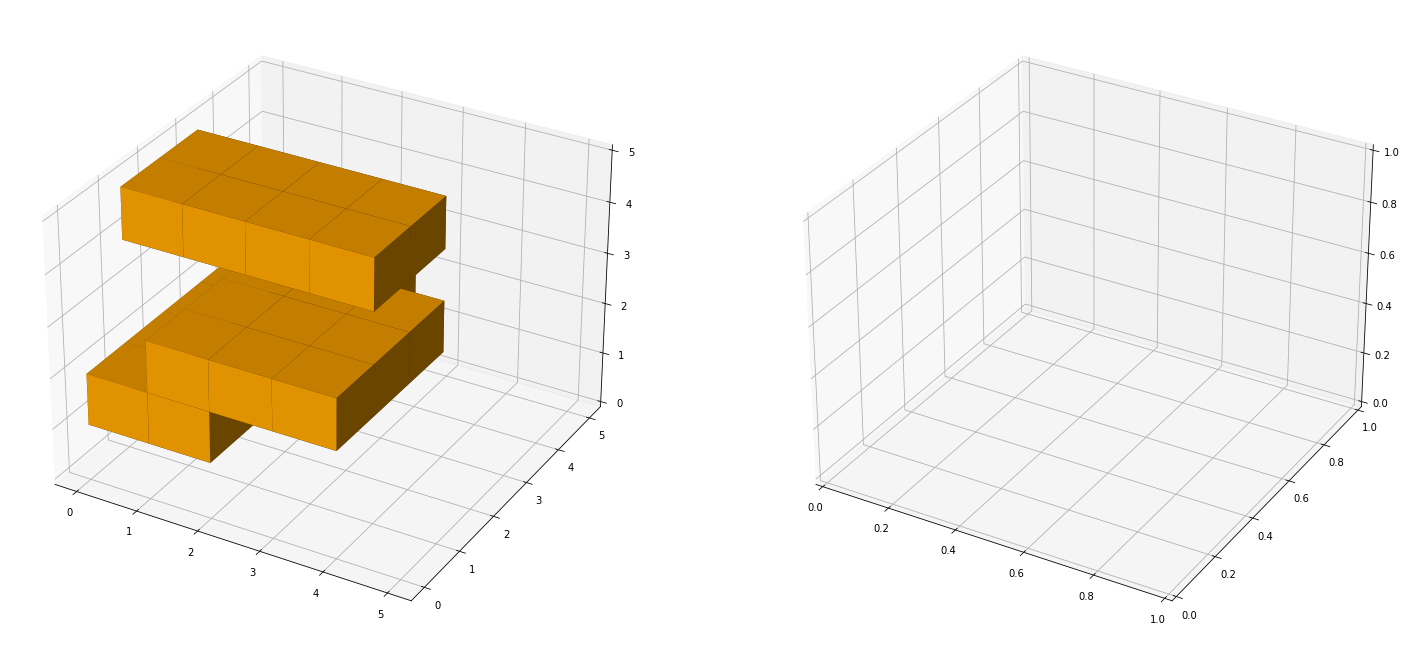

In [160]:
sculptor.plot_sculpture()

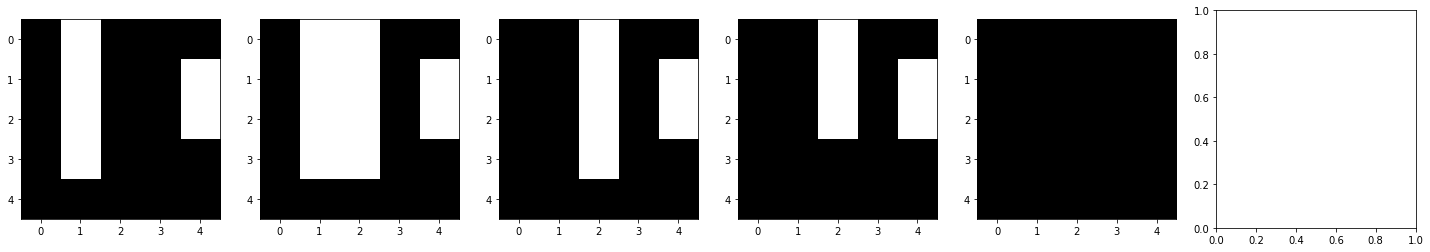

In [161]:
sculptor.plot_sections()

In [155]:
def add_plane(void, axis_selection, element_min_side=4, element_max_side=14, step=1, verbose=True): # element sizes
    
    section = np.random.randint(low=0-1, high=void[0].shape[0])
    # selection of the axis to work on
    
    if axis_selection == 0:
        working_plane = void[section,:,:]
    elif axis_selection == 1:
        working_plane = void[:,section,:]  
    elif axis_selection == 2:
        working_plane = void[:,:,section]
    else:
        print("error")
    # axis selection
        
    if verbose == True:
        print(working_plane)
        print("###############################################################")
    
    #Variables
    
    element = np.ones((random.randrange(element_min_side, element_max_side, step), random.randrange(element_min_side, element_max_side, step)))
    # creates the element to be inserted
    delta = np.array(working_plane.shape) - np.array(element.shape) 
    # finds the delta between the size of the void and the size of the element
    top_left_corner = (coor_i, coor_j) = (np.random.randint(low=0, high=delta[0]) , np.random.randint(low=0, high=delta[1]))
    # finds the coordinates of the top left corner
    top_left_corner = np.array(top_left_corner)
    # converts the result in an array
    bottom_right_corner = np.array(top_left_corner) + np.array(element.shape) #- np.array([1,1]))
    # finds the coordinates of the bottom right corner
    working_plane[top_left_corner[0]:bottom_right_corner[0] , top_left_corner[1]:bottom_right_corner[1]] = element
    # makes the slides using the coordinates equal to the element
    
    if verbose == True:
        print(f"void shape is: {np.array(void[0].shape)}")
        print(f"element shape is : {np.array(element.shape)}")
        print(f"the axis selection is: {axis_selection}")
        print(f"delta is: {delta}")
        print(f"section is: {section}")
        print(f"top left corner is: {top_left_corner}")
        print(f"bottom right corner is: {bottom_right_corner}")
        print(f"slices are: {top_left_corner[0]}:{bottom_right_corner[0]} and {top_left_corner[1]}:{bottom_right_corner[1]}")
        print("###############################################################")

In [ ]:
def add_edge(void, axis_selection, element_min_side=1, element_max_side=14, step=1, verbose=True): # element sizes
    
    section = np.random.randint(low=0-1, high=void[0].shape[0])
    # selection of the axis to work on
    
    if axis_selection == 0:
        working_plane = void[section,:,:]
    elif axis_selection == 1:
        working_plane = void[:,section,:]  
    elif axis_selection == 2:
        working_plane = void[:,:,section]
    else:
        print("error")
    # axis selection
        
    if verbose == True:
        print(working_plane)
        print("###############################################################")
    
    #Variables
    
    edge_length = random.randrange(element_min_side, element_max_side, step)
    
    edge_plane = np.random.randint(low=0, high=2)
    
    if edge_plane == 0:
        element = np.ones(edge_length).reshape(edge_length,1)
    else:
        element = np.ones(edge_length).reshape(edge_length,1).T
        
    # creates the element to be inserted
    delta = np.array(working_plane.shape) - np.array(element.shape) 
    # finds the delta between the size of the void and the size of the element
    top_left_corner = (coor_i, coor_j) = (np.random.randint(low=0, high=delta[0]) , np.random.randint(low=0, high=delta[1]))
    # finds the coordinates of the top left corner
    top_left_corner = np.array(top_left_corner)
    # converts the result in an array
    bottom_right_corner = np.array(top_left_corner) + np.array(element.shape) #- np.array([1,1]))
    # finds the coordinates of the bottom right corner
    working_plane[top_left_corner[0]:bottom_right_corner[0] , top_left_corner[1]:bottom_right_corner[1]] = element
    # makes the slides using the coordinates equal to the element
    
    if verbose == True:
        print(f"void shape is: {np.array(void[0].shape)}")
        print(f"element shape is : {np.array(element.shape)}")
        print(f"the axis selection is: {axis_selection}")
        print(f"delta is: {delta}")
        print(f"section is: {section}")
        print(f"top left corner is: {top_left_corner}")
        print(f"bottom right corner is: {bottom_right_corner}")
        print(f"slices are: {top_left_corner[0]}:{bottom_right_corner[0]} and {top_left_corner[1]}:{bottom_right_corner[1]}")
        print("###############################################################")


In [ ]:
def add_volume(void, axis_selection, element_min_side=4, element_max_side=14, step=1, verbose=True): # element sizes
    
    #Variables
    
    depth = random.randrange(element_min_side, element_max_side, step)

    element = np.ones((random.randrange(element_min_side, element_max_side, step), random.randrange(element_min_side, element_max_side, step)))
    element = np.repeat(element, repeats=depth, axis=0).reshape((element.shape[0],element.shape[1],depth))

    element_void = np.zeros((element.shape[0]-2, element.shape[1]-2))
    element_void = np.repeat(element_void, repeats=depth-2).reshape((element_void.shape[0],element_void.shape[1],depth-2))

    element[1:-1,1:-1,1:-1] = element_void

    #print(element.shape)
    #print(element_void.shape)
    
    # creates the element to be inserted
    delta = np.array(void.shape) - np.array(element.shape) # ENCONTRAR LOS NUEVOS DELTAS
    
    
    top_left_front_corner = (coor_i, coor_j, coor_k) = (np.random.randint(low=0, high=delta[0]) , np.random.randint(low=0, high=delta[1]), np.random.randint(low=0, high=delta[2]))
    # finds the coordinates of the top left corner
    top_left_front_corner = np.array(top_left_front_corner)
    # converts the result in an array
    bottom_right_back_corner = np.array(top_left_front_corner) + np.array(element.shape)

    void[top_left_front_corner[0]:bottom_right_back_corner[0] , top_left_front_corner[1]:bottom_right_back_corner[1], top_left_front_corner[2]:bottom_right_back_corner[2]] = element
    
    if verbose == True:
        print(f"void shape is: {np.array(void[0].shape)}")
        print(f"element shape is : {np.array(element.shape)}")
        print(f"the axis selection is: {axis_selection}")
        print(f"delta is: {delta}")
        print(f"section is: {section}")
        print(f"top left front corner is: {top_left_front_corner}")
        print(f"bottom right back corner is: {bottom_right_back_corner}")
        #print(f"slices are: {top_left_corner[0]}:{bottom_right_corner[0]} and {top_left_corner[1]}:{bottom_right_corner[1]}")
        print("###############################################################")

In [ ]:
def add_pipe(void, axis_selection, element_min_side=4, element_max_side=14, step=1, verbose=True): # pipe not in the right direction
    
    #Variables
    
    depth = random.randrange(element_min_side, element_max_side, step)

    element = np.ones((random.randrange(element_min_side, element_max_side, step), random.randrange(element_min_side, element_max_side, step)))
    element = np.repeat(element, repeats=depth, axis=0).reshape((element.shape[0],element.shape[1],depth))

    # HEREEEEE
    
    element_void = np.zeros((element.shape[0]-2, element.shape[1]-2))
    element_void = np.repeat(element_void, repeats=depth).reshape((element_void.shape[0],element_void.shape[1],depth))

    element[1:-1,1:-1,:] = element_void

    #print(element.shape)
    #print(element_void.shape)
    
    # creates the element to be inserted
    delta = np.array(void.shape) - np.array(element.shape) # ENCONTRAR LOS NUEVOS DELTAS
    
    
    top_left_front_corner = (coor_i, coor_j, coor_k) = (np.random.randint(low=0, high=delta[0]) , np.random.randint(low=0, high=delta[1]), np.random.randint(low=0, high=delta[2]))
    # finds the coordinates of the top left corner
    top_left_front_corner = np.array(top_left_front_corner)
    # converts the result in an array
    bottom_right_back_corner = np.array(top_left_front_corner) + np.array(element.shape)

    void[top_left_front_corner[0]:bottom_right_back_corner[0] , top_left_front_corner[1]:bottom_right_back_corner[1], top_left_front_corner[2]:bottom_right_back_corner[2]] = element
    
    if verbose == True:
        print(f"void shape is: {np.array(void[0].shape)}")
        print(f"element shape is : {np.array(element.shape)}")
        print(f"the axis selection is: {axis_selection}")
        print(f"delta is: {delta}")
        print(f"section is: {section}")
        print(f"top left front corner is: {top_left_front_corner}")
        print(f"bottom right back corner is: {bottom_right_back_corner}")
        #print(f"slices are: {top_left_corner[0]}:{bottom_right_corner[0]} and {top_left_corner[1]}:{bottom_right_corner[1]}")
        print("###############################################################")

In [ ]:
def add_cantilever(void, axis_selection, element_min_side=4, element_max_side=14, step=1, verbose=True): # pipe not in the right direction
    
    #Variables
    
    depth = random.randrange(element_min_side, element_max_side, step)

    element = np.ones((random.randrange(element_min_side, element_max_side, step), random.randrange(element_min_side, element_max_side, step)))
    element = np.repeat(element, repeats=depth, axis=0).reshape((element.shape[0],element.shape[1],depth))

    # HEREEEEE
    
    element_void = np.zeros((element.shape[0]-2, element.shape[1]-2))
    element_void = np.repeat(element_void, repeats=depth).reshape((element_void.shape[0],element_void.shape[1],depth))

    element[1:-1,1:-1,:] = element_void

    #print(element.shape)
    #print(element_void.shape)
    
    # creates the element to be inserted
    delta = np.array(void.shape) - np.array(element.shape) # ENCONTRAR LOS NUEVOS DELTAS
    
    
    top_left_front_corner = (coor_i, coor_j, coor_k) = (np.random.randint(low=0, high=delta[0]) , np.random.randint(low=0, high=delta[1]), np.random.randint(low=0, high=delta[2]))
    # finds the coordinates of the top left corner
    top_left_front_corner = np.array(top_left_front_corner)
    # converts the result in an array
    bottom_right_back_corner = np.array(top_left_front_corner) + np.array(element.shape)

    void[top_left_front_corner[0]:bottom_right_back_corner[0] , top_left_front_corner[1]:bottom_right_back_corner[1], top_left_front_corner[2]:bottom_right_back_corner[2]] = element
    
    if verbose == True:
        print(f"void shape is: {np.array(void[0].shape)}")
        print(f"element shape is : {np.array(element.shape)}")
        print(f"the axis selection is: {axis_selection}")
        print(f"delta is: {delta}")
        print(f"section is: {section}")
        print(f"top left front corner is: {top_left_front_corner}")
        print(f"bottom right back corner is: {bottom_right_back_corner}")
        #print(f"slices are: {top_left_corner[0]}:{bottom_right_corner[0]} and {top_left_corner[1]}:{bottom_right_corner[1]}")
        print("###############################################################")

In [ ]:
def generative_sculpt(void_dim=12, n_planes=25):
    
    void = np.zeros((void_dim, void_dim, void_dim))
    
    

    for i in range(n_planes):
        time.sleep(0)
        axis_selection = np.random.randint(low=0, high=3)
        add_plane(void, axis_selection, element_min_side=9, element_max_side=17, step=1, verbose=False)
        
        axis_selection = np.random.randint(low=0, high=3)
        add_edge(void, axis_selection, element_min_side=12, element_max_side=24, step=1, verbose=False)

    for i in range(n_planes):
        add_pipe(void, axis_selection, element_min_side=4, element_max_side=14, step=1, verbose=False)
    
    return void

In [ ]:
data = []

count = 0

for i in range(150): #
    count = count + 1
    if count % 10 == 0:
        print("\r{0}".format(count), end='')
    data.append(generative_sculpt(void_dim=29, n_planes=10))